# Importing the necessary libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading dataset

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df=df.rename(columns = {'Annual Income (k$)' : 'Annual_Income','Spending Score (1-100)' : 'Spending_Score'})

In [5]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Preprocessing

In [8]:
df.isnull().any()

CustomerID        False
Gender            False
Age               False
Annual_Income     False
Spending_Score    False
dtype: bool

In [9]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

# Descriptive statistics

In [10]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.describe(include="all")

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [12]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df.Spending_Score.unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

# Visualisation

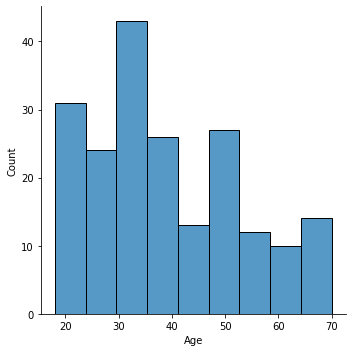

In [14]:
sns.displot(df.Age)

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

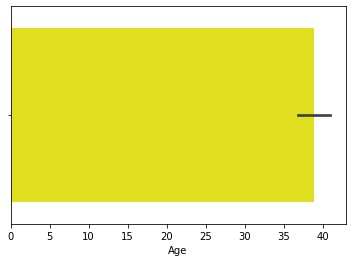

In [15]:
sns.barplot(df.Age,color='yellow')

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

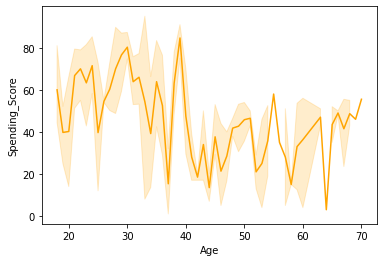

In [16]:
sns.lineplot(x=df.Age, y=df.Spending_Score,color='orange')

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

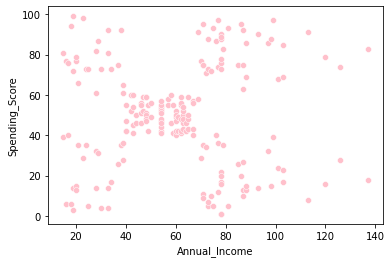

In [17]:
sns.scatterplot(df.Annual_Income,df.Spending_Score,color='pink')

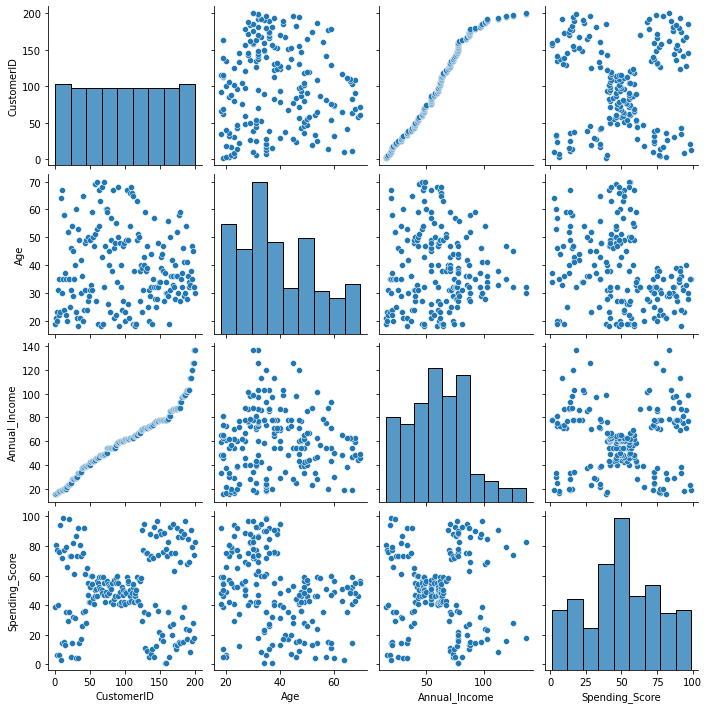

In [18]:
sns.pairplot(df)

# Handling outliers

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

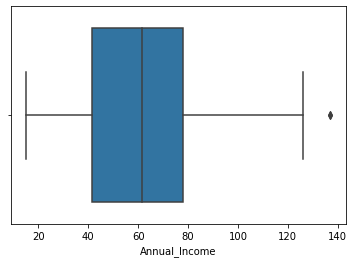

In [19]:
sns.boxplot(df['Annual_Income'])

In [20]:
q1 = df.Annual_Income.quantile(0.25)
q2 = df.Annual_Income.quantile(0.75)
IQR = q2 - q1
IQR

36.5

In [21]:
df=df[~((df.Annual_Income<(q1-1.5*IQR))|(df.Annual_Income>(q2+1.5*IQR)))]
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [22]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,198.000000,198.000000,198.000000,198.000000
mean,99.500000,38.929293,59.787879,50.196970
std,57.301832,14.016852,25.237259,25.746846
min,1.000000,18.000000,15.000000,1.000000
25%,50.250000,28.250000,40.500000,35.000000
50%,99.500000,36.000000,61.000000,50.000000
75%,148.750000,49.000000,77.750000,72.750000
max,198.000000,70.000000,126.000000,99.000000


C:\Users\balaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

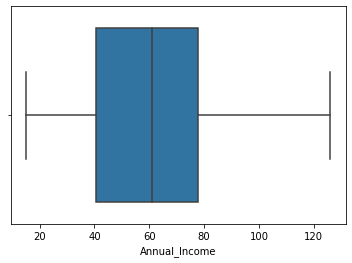

In [23]:
sns.boxplot(df['Annual_Income'])

# Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:

le=LabelEncoder()

In [26]:
df.Gender = le.fit_transform(df.Gender)

C:\Users\balaj\AppData\Local\Temp\ipykernel_27424\683395824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender = le.fit_transform(df.Gender)


In [27]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [28]:
df.corr()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
CustomerID,1.000000,0.038684,-0.017285,0.984367,0.013840
Gender,0.038684,1.000000,0.067835,0.024384,-0.059092
Age,-0.017285,0.067835,1.000000,0.004406,-0.329421
Annual_Income,0.984367,0.024384,0.004406,1.000000,0.010080
Spending_Score,0.013840,-0.059092,-0.329421,0.010080,1.000000


<AxesSubplot:>

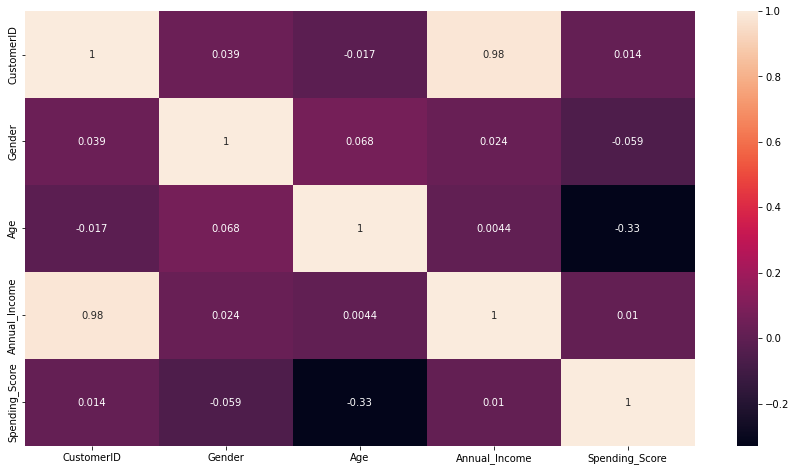

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [30]:
df.corr().Spending_Score.sort_values(ascending=False)

Spending_Score    1.000000
CustomerID        0.013840
Annual_Income     0.010080
Gender           -0.059092
Age              -0.329421
Name: Spending_Score, dtype: float64

# Scaling


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00507614, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01015228, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01522843, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.02030457, 0.        , 0.25      , 0.01801802, 0.39795918]])

# K means clustering

In [32]:
from sklearn.cluster import KMeans
km = KMeans()
result = km.fit_predict(data_scaled)
result

array([1, 1, 2, 2, 2, 2, 2, 2, 7, 2, 7, 2, 5, 2, 1, 1, 2, 1, 7, 2, 1, 1,
       5, 1, 5, 1, 5, 1, 5, 2, 7, 2, 7, 1, 5, 2, 5, 2, 2, 2, 5, 1, 7, 2,
       5, 2, 5, 2, 2, 2, 5, 1, 2, 7, 5, 7, 5, 7, 2, 7, 7, 1, 5, 5, 7, 1,
       5, 5, 1, 2, 7, 5, 5, 5, 7, 1, 5, 1, 2, 5, 7, 1, 7, 5, 2, 7, 5, 2,
       2, 5, 5, 1, 7, 5, 2, 1, 5, 2, 7, 1, 2, 5, 7, 1, 7, 2, 5, 7, 7, 7,
       7, 2, 5, 1, 2, 2, 5, 5, 5, 5, 6, 4, 0, 6, 4, 0, 3, 6, 3, 6, 3, 6,
       4, 0, 3, 0, 4, 6, 3, 0, 4, 6, 4, 0, 3, 6, 3, 0, 4, 6, 3, 6, 4, 0,
       4, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 4, 6, 3, 6, 3, 6, 4, 0,
       3, 6, 3, 6, 4, 0, 3, 0, 4, 6, 4, 6, 4, 0, 4, 0, 3, 0, 4, 0, 4, 6])

In [33]:
data1 = pd.DataFrame(data_scaled, columns = df.columns)
data1.drop('CustomerID',axis=1,inplace=True)
data1.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [34]:
data1['kclus']  = pd.Series(result)
data1.head()


,Gender,Age,Annual_Income,Spending_Score,kclus
0,1.0,0.019231,0.000000,0.387755,1
1,1.0,0.057692,0.000000,0.816327,1
2,0.0,0.038462,0.009009,0.051020,2
3,0.0,0.096154,0.009009,0.775510,2
4,0.0,0.250000,0.018018,0.397959,2


In [35]:
data1['kclus'].unique()

array([1, 2, 7, 5, 6, 4, 0, 3])

In [36]:
data1['kclus'].value_counts()

2    36
5    35
7    25
1    24
0    22
4    19
3    19
6    18
Name: kclus, dtype: int64

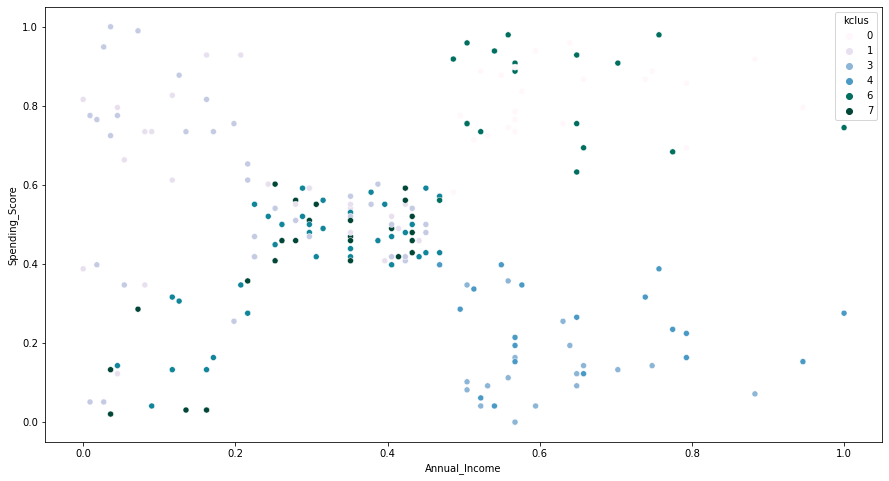

In [37]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual_Income'],
                y=data1['Spending_Score'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [38]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [41]:
dep = data1.iloc[:,4:]
dep.head()


,kclus
0,1
1,1
2,2
3,2
4,2


# Train and Test split

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual_Income,Spending_Score
124,0.0,0.096154,0.495495,0.285714
97,0.0,0.173077,0.405405,0.500000
42,1.0,0.576923,0.216216,0.357143
17,1.0,0.038462,0.054054,0.663265
5,0.0,0.076923,0.018018,0.765306


In [43]:
x_test.head()

,Gender,Age,Annual_Income,Spending_Score
175,0.0,0.230769,0.657658,0.867347
40,0.0,0.903846,0.207207,0.346939
34,0.0,0.596154,0.162162,0.132653
90,0.0,0.961538,0.396396,0.551020
145,1.0,0.192308,0.558559,0.979592


In [44]:
y_train.head()

,kclus
124,4
97,2
42,7
17,1
5,2


In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[1.85247649],
       [5.8970924 ],
       [4.29849767],
       [6.08313458],
       [2.72869392]])

# Measuring using Metrics

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_test,y_test)
acc = lr.score(x_test,y_test)

In [49]:
print("The Mean squared error is     :", mse)
print("The Root mean squared error is: ", rmse)
print("The Mean absolute error is    : ", mae)
print("The accuracy is               : ", acc)

The Mean squared error is     : 2.642041158259558
The Root mean squared error is:  1.6254356825969947
The Mean absolute error is    :  1.3677466589373368
The accuracy is               :  0.4250877556978717
